# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

'http://api.openweathermap.org/data/2.5/weather?appid=583de00c326f16220613d839e6918635&units=metric&q='

In [4]:
# set lists to hold response info

lat = []
lon = []
temp = []
humid = []
cloud = []
winds = []
city_list = []

# Loop through the list of cities and perform a request for data on each

for city in cities:
    response = requests.get(query_url + city).json()
    try:
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])
        city_list.append(city)
        time.sleep(1)
    except:
        time.sleep(1)
        pass


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    'city': city_list,
    'temperature': temp,
    'humidity': humid,
    'cloudiness': cloud,
    'wind_speed': winds,
    'latitude': lat,
    'longitude': lon
}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()


,city,temperature,humidity,cloudiness,wind_speed,latitude,longitude
0,busselton,14.86,53,20,8.48,-33.65,115.33
1,butaritari,28.60,80,97,9.82,3.07,172.79
2,tual,28.08,75,76,4.66,-5.67,132.75
3,ribeira grande,17.00,93,75,9.80,38.52,-28.70
4,punta arenas,15.95,71,0,4.60,-53.15,-70.92


In [6]:
# creating the DataFrame
weather_df = pd.DataFrame(weather_dict, columns=['city', 'temperature', 'humidity', 'cloudiness', 'wind_speed', 'latitude', 'longitude'])

# Feeding the DataFrame with the data

export_csv = weather_df.to_csv(r'/Users/macchina/Desktop/BootCamp/python-api-challenge/WeatherPy/WeatherPy.csv')

print(weather_df)


               city  temperature  humidity  cloudiness  wind_speed  latitude  \
0         busselton        14.86        53          20        8.48    -33.65   
1        butaritari        28.60        80          97        9.82      3.07   
2              tual        28.08        75          76        4.66     -5.67   
3    ribeira grande        17.00        93          75        9.80     38.52   
4      punta arenas        15.95        71           0        4.60    -53.15   
..              ...          ...       ...         ...         ...       ...   
567       kushmurun       -11.10        91         100        3.43     52.45   
568    port-cartier       -15.16        41          20        5.70     50.03   
569   ponta delgada        18.00        77          20        8.70     37.73   
570      agua verde        17.65       100          75        1.50     22.90   
571            asfi        19.28        61          36        6.15     32.30   

     longitude  
0       115.33  
1    

In [7]:
import csv
import os

In [8]:
weather_data = "WeatherPy.csv"

weather_df = pd.read_csv(weather_data)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

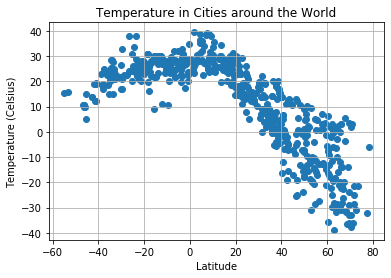

In [9]:
# Build a scatter plot
plt.scatter(weather_df['latitude'], weather_df['temperature'], marker='o')

# Incorporate the other graph properties
plt.title('Temperature in Cities around the World')
plt.ylabel('Temperature (Celsius)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig('TemperatureInWorldCities.png')

#show plot
plt.show()

#### Latitude vs. Humidity Plot

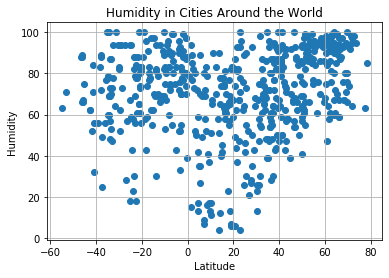

In [10]:
#build a scatter plot

plt.scatter(weather_df['latitude'], weather_df['humidity'], marker='o')

# Incorporate the other graph properties
plt.title('Humidity in Cities Around the World')
plt.ylabel('Humidity')
plt.xlabel('Latitude')
plt.grid(True)

#save the figure
plt.savefig('HumidityInWorldCities.png')

#show plot
plt.show()

#### Latitude vs. Cloudiness Plot

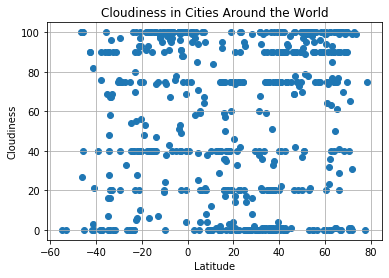

In [11]:
# build a sactter plot

plt.scatter(weather_df['latitude'], weather_df['cloudiness'], marker='o')

# Incorporate the other graph properties
plt.title('Cloudiness in Cities Around the World')
plt.ylabel('Cloudiness')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('CloudinessInWorldCities.png')

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

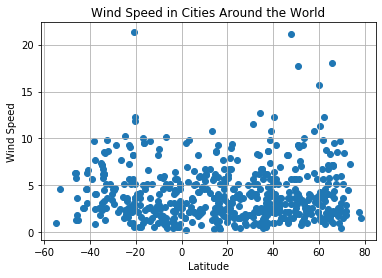

In [12]:
# Build a scatter plot

plt.scatter(weather_df['latitude'], weather_df['wind_speed'], marker='o')

# Incorporate the other graph properties
plt.title('Wind Speed in Cities Around the World')
plt.ylabel('Wind Speed')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig('WindSpeedInWorldCities.png')

# Show plot
plt.show()

## Linear Regression

In [13]:
# OPTIONAL: Create a function to create Linear Regression plots


In [14]:
# Create Northern and Southern Hemisphere DataFrames
import numpy as np
from sklearn.linear_model import LinearRegression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Defining data
north_data = pd.DataFrame(columns=['city','temperature','humidity','cloudiness','wind_speed','latitude','longitude'])

north_data = weather_df[weather_df['latitude'] >= 0]
south_data = weather_df[weather_df['latitude'] < 0]


In [16]:
north_data

,Unnamed: 0,city,temperature,humidity,cloudiness,wind_speed,latitude,longitude
1,1,butaritari,28.60,80,97,9.82,3.07,172.79
3,3,ribeira grande,17.00,93,75,9.80,38.52,-28.70
5,5,ponta do sol,19.12,68,20,4.10,32.67,-17.10
7,7,tura,17.27,55,17,1.47,25.52,90.22
8,8,fort smith,1.81,93,1,2.10,35.39,-94.40
...,...,...,...,...,...,...,...,...
567,567,kushmurun,-11.10,91,100,3.43,52.45,64.63
568,568,port-cartier,-15.16,41,20,5.70,50.03,-66.87
569,569,ponta delgada,18.00,77,20,8.70,37.73,-25.67
570,570,agua verde,17.65,100,75,1.50,22.90,-106.05


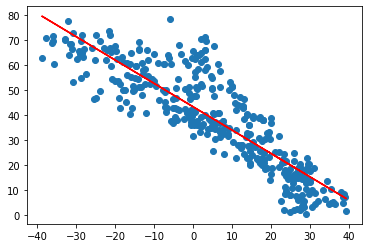

In [17]:
x = np.array(north_data['temperature']).reshape((-1,1))
y = np.array(north_data['latitude'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

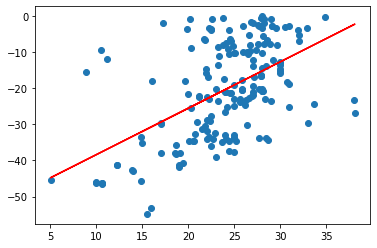

In [18]:
x = np.array(south_data['temperature']).reshape((-1,1))
y = np.array(south_data['latitude'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

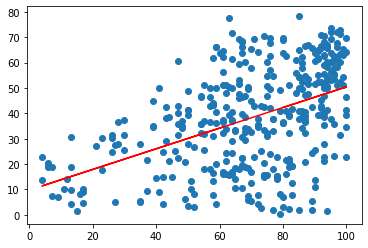

In [19]:
x = np.array(north_data['humidity']).reshape((-1,1))
y = np.array(north_data['latitude'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

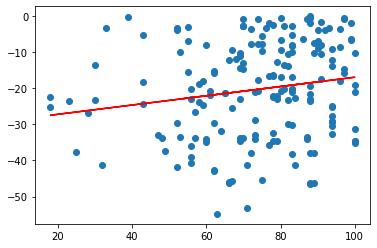

In [20]:
x = np.array(south_data['humidity']).reshape((-1,1))
y = np.array(south_data['latitude'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

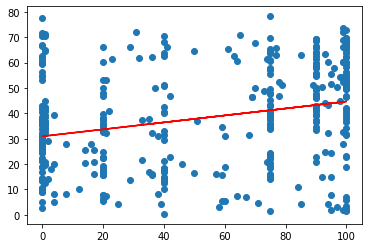

In [21]:
x = np.array(north_data['cloudiness']).reshape((-1,1))
y = np.array(north_data['latitude'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

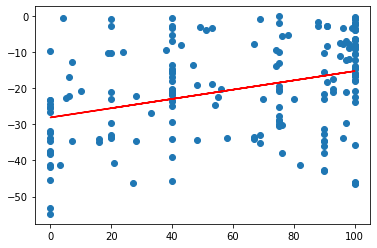

In [22]:
x = np.array(south_data['cloudiness']).reshape((-1,1))
y = np.array(south_data['latitude'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

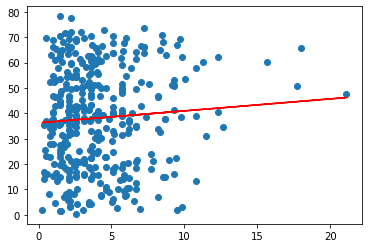

In [23]:
x = np.array(north_data['wind_speed']).reshape((-1,1))
y = np.array(north_data['latitude'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

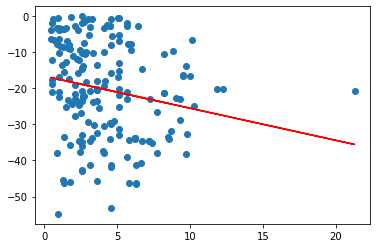

In [24]:
x = np.array(south_data['wind_speed']).reshape((-1,1))
y = np.array(south_data['latitude'])

#create a model and fit it
model = LinearRegression().fit(x,y)
             
#make predictions
y_pred = model.predict(x)

plt.scatter(x,y)
plt.plot(x,y_pred, color='red')
plt.show()